# 문제 1
- 행렬 테두리 회전하기
- https://school.programmers.co.kr/learn/courses/30/lessons/77485#


```문제 설명```
```
rows x columns 크기인 행렬이 있습니다. 행렬에는 1부터 rows x columns까지의 숫자가 한 줄씩 순서대로 적혀있습니다. 이 행렬에서 직사각형 모양의 범위를 여러 번 선택해, 테두리 부분에 있는 숫자들을 시계방향으로 회전시키려 합니다. 각 회전은 (x1, y1, x2, y2)인 정수 4개로 표현하며, 그 의미는 다음과 같습니다.

x1 행 y1 열부터 x2 행 y2 열까지의 영역에 해당하는 직사각형에서 테두리에 있는 숫자들을 한 칸씩 시계방향으로 회전합니다.
다음은 6 x 6 크기 행렬의 예시입니다.
```
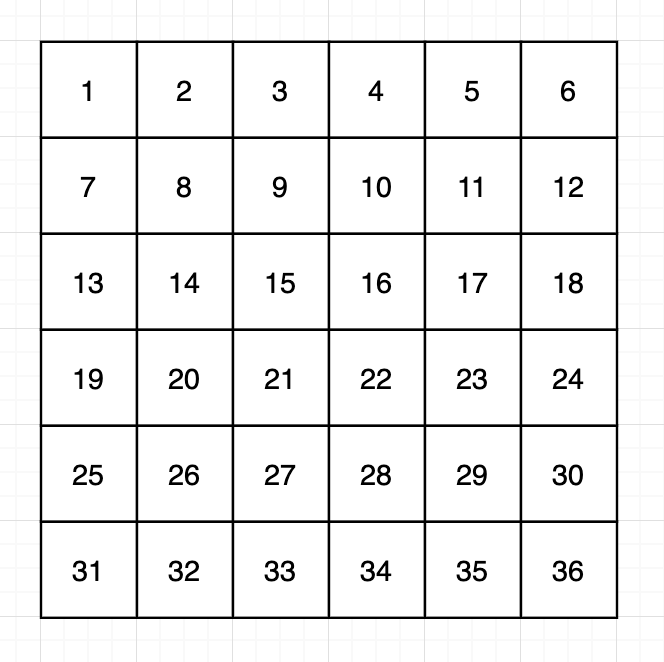

```
이 행렬에 (2, 2, 5, 4) 회전을 적용하면, 아래 그림과 같이 2행 2열부터 5행 4열까지 영역의 테두리가 시계방향으로 회전합니다. 이때, 중앙의 15와 21이 있는 영역은 회전하지 않는 것을 주의하세요.
```
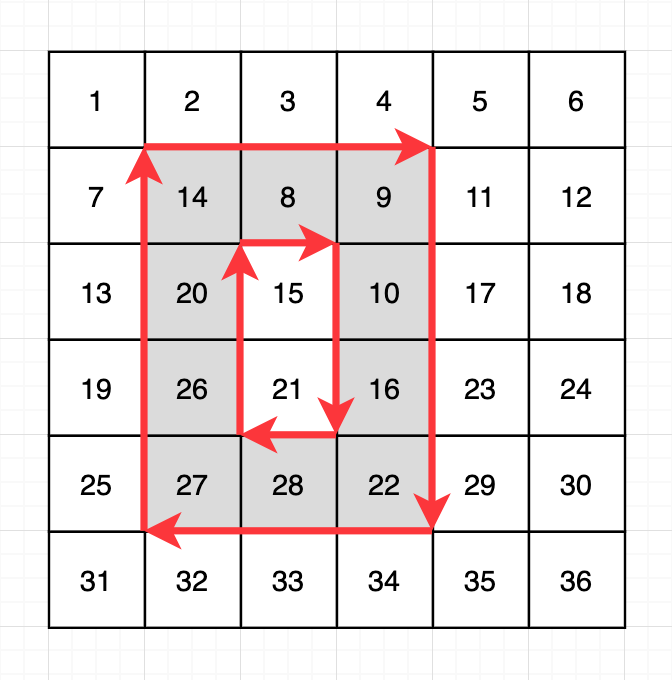

```
행렬의 세로 길이(행 개수) rows, 가로 길이(열 개수) columns, 그리고 회전들의 목록 queries가 주어질 때, 각 회전들을 배열에 적용한 뒤, 그 회전에 의해 위치가 바뀐 숫자들 중 가장 작은 숫자들을 순서대로 배열에 담아 return 하도록 solution 함수를 완성해주세요.
```

```제한사항```
```
rows는 2 이상 100 이하인 자연수입니다.
columns는 2 이상 100 이하인 자연수입니다.
처음에 행렬에는 가로 방향으로 숫자가 1부터 하나씩 증가하면서 적혀있습니다.
즉, 아무 회전도 하지 않았을 때, i 행 j 열에 있는 숫자는 ((i-1) x columns + j)입니다.
queries의 행의 개수(회전의 개수)는 1 이상 10,000 이하입니다.
queries의 각 행은 4개의 정수 [x1, y1, x2, y2]입니다.
x1 행 y1 열부터 x2 행 y2 열까지 영역의 테두리를 시계방향으로 회전한다는 뜻입니다.
1 ≤ x1 < x2 ≤ rows, 1 ≤ y1 < y2 ≤ columns입니다.
모든 회전은 순서대로 이루어집니다.
예를 들어, 두 번째 회전에 대한 답은 첫 번째 회전을 실행한 다음, 그 상태에서 두 번째 회전을 실행했을 때 이동한 숫자 중 최솟값을 구하면 됩니다.
```
```입출력 예시```
```
rows	columns	queries	result
6	6	[[2,2,5,4],[3,3,6,6],[5,1,6,3]]	[8, 10, 25]
3	3	[[1,1,2,2],[1,2,2,3],[2,1,3,2],[2,2,3,3]]	[1, 1, 5, 3]
100	97	[[1,1,100,97]]	[1]
```

```입출력 예 설명```
```
입출력 예 #1

회전을 수행하는 과정을 그림으로 표현하면 다음과 같습니다.
```
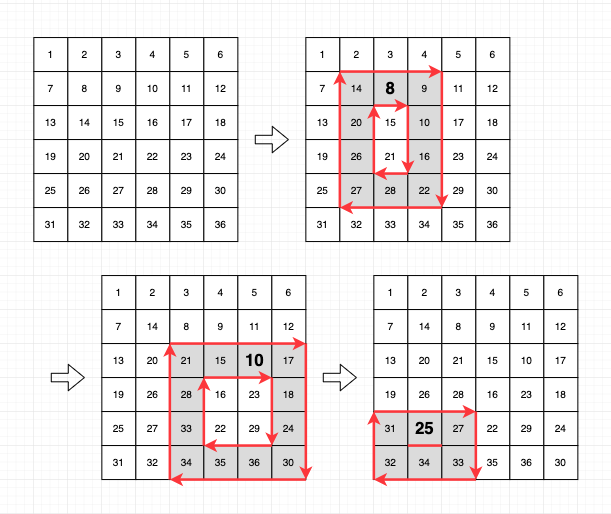

```
입출력 예 #2

회전을 수행하는 과정을 그림으로 표현하면 다음과 같습니다.
```
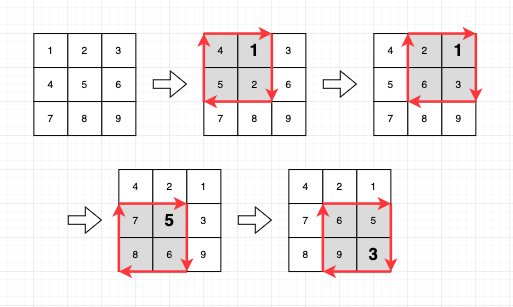
```
입출력 예 #3

이 예시에서는 행렬의 테두리에 위치한 모든 칸들이 움직입니다. 따라서, 행렬의 테두리에 있는 수 중 가장 작은 숫자인 1이 바로 답이 됩니다.
```

In [ ]:
def solution(rows, columns, queries):
    board = [list(range(columns*i+1,columns*(i+1) + 1)) for i in range(rows)]

    answer = []
    for each in queries:
        min_num = rows * columns
        
        x1,y1,x2,y2 = each[0]-1,each[1]-1,each[2]-1,each[3]-1
        edges = [board[x1][y1],board[x1][y2],board[x2][y1],board[x2][y2]]
        
        # 윗줄 처리
        # print('윗줄 변경 사항 :',board[x1][y1:y2])
        if min(board[x1][y1:y2]) < min_num:
            min_num = min(board[x1][y1:y2])
        board[x1][y1+1:y2+1] = board[x1][y1:y2]
        
        # 오른쪽 줄 처리
        for i in range(x2,x1,-1):
            if i == x1+1:
                board[i][y2] = edges[1]
                # print('오른쪽줄 변경 사항 :',edges[1])
                if edges[1] < min_num:
                    min_num = edges[1]
            else:
                board[i][y2] = board[i-1][y2]
                # print('오른쪽줄 변경 사항 :',board[i-1][y2])
                if board[i-1][y2] < min_num:
                    min_num = board[i-1][y2]
        
        # 아래 줄 처리
        # print('아랫줄 변경 사항 :',board[x2][y1+1:y2] + [edges[3]])
        if min(board[x2][y1+1:y2] + [edges[3]]) < min_num:
            min_num = min(board[x2][y1+1:y2] + [edges[3]])
        board[x2][y1:y2] = board[x2][y1+1:y2] + [edges[3]]
        
        
        # 왼쪽 줄 처리
        for i in range(x1+1,x2+1):
            if i == x2:
                board[i-1][y1] = edges[2]
                # print('왼쪽줄 변경 사항 :',edges[2])
                if edges[2] < min_num:
                    min_num = edges[2]
            else:
                board[i-1][y1] = board[i][y1]
                # print('왼쪽줄 변경 사항 :',board[i][y1])
                if board[i][y1] < min_num:
                    min_num = board[i][y1]
    
        answer.append(min_num)
        
    return answer


# 문제 2
- 전화번호 목록
- https://school.programmers.co.kr/learn/courses/30/lessons/42577#qna

```문제 설명```
```
전화번호부에 적힌 전화번호 중, 한 번호가 다른 번호의 접두어인 경우가 있는지 확인하려 합니다.
전화번호가 다음과 같을 경우, 구조대 전화번호는 영석이의 전화번호의 접두사입니다.

구조대 : 119
박준영 : 97 674 223
지영석 : 11 9552 4421
전화번호부에 적힌 전화번호를 담은 배열 phone_book 이 solution 함수의 매개변수로 주어질 때, 어떤 번호가 다른 번호의 접두어인 경우가 있으면 false를 그렇지 않으면 true를 return 하도록 solution 함수를 작성해주세요.
```

```제한 사항```

```
phone_book의 길이는 1 이상 1,000,000 이하입니다.
각 전화번호의 길이는 1 이상 20 이하입니다.
같은 전화번호가 중복해서 들어있지 않습니다.
```
```입출력 예제```
```
phone_book	return
["119", "97674223", "1195524421"]	false
["123","456","789"]	true
["12","123","1235","567","88"]	false
```
```입출력 예 설명```
```
입출력 예 #1
앞에서 설명한 예와 같습니다.

입출력 예 #2
한 번호가 다른 번호의 접두사인 경우가 없으므로, 답은 true입니다.

입출력 예 #3
첫 번째 전화번호, “12”가 두 번째 전화번호 “123”의 접두사입니다. 따라서 답은 false입니다.

```